<a href="https://colab.research.google.com/github/Ahmad-Nedal/Training-TH2-projs/blob/main/Elastic_last_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STRATIFIES K-FOLD CROSS VALIDATION
%matplotlib inline
import numpy as num
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
from google.colab import drive
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

In [2]:
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/thesis2/606_Full.csv", index_col=0, parse_dates=True)  
df = pd.read_csv('https://raw.githubusercontent.com/Ahmad-Nedal/TH2/main/DTI-606.csv')
x = df.iloc[:, 4:].values
y = df.iloc[:, 3].values

In [3]:
labels, counts = num.unique(y, return_counts=True)
print(labels, counts)

[1 2 3] [181 296 129]


In [4]:
#Encoding Categorical Data
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [5]:

# Create classifier object.
sv = svm.SVC(class_weight= 'balanced')
#lr = LogisticRegressionCV(cv=None, random_state=0, solver= 'liblinear', class_weight= 'balanced',)

In [6]:
# Create StratifiedKFold object.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Imputer = SimpleImputer(missing_values=num.nan, strategy='mean')
StSc = StandardScaler()
elastic_cv=ElasticNetCV(alphas=None, cv=5)

lst_accu_stratified = []
predicted_targets = num.array([])
actual_targets = num.array([])

ypred_Elastic= num.array([])
Alf_targets= num.array([])
Intr_targets= num.array([])
score_targets= num.array([])
mse_targets= num.array([])

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x[train_index], x[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]

	x_train_imputed = Imputer.fit_transform(x_train_fold)
	x_train_scaled = StSc.fit_transform(x_train_imputed)

	x_test_imputed = Imputer.transform(x_test_fold)
	x_test_scaled = StSc.transform(x_test_imputed)
 	##
	classifiers=sv.fit(x_train_scaled, y_train_fold)
	predicted_labels = classifiers.predict(x_test_scaled)
	predicted_targets = num.append(predicted_targets, predicted_labels)
	actual_targets = num.append(actual_targets, y_test_fold)
 ####
	model = elastic_cv.fit(x_train_scaled, y_train_fold)
	ypred_labels = model.predict(x_test_scaled)
	ypred_Elastic = num.append(ypred_Elastic, ypred_labels)
 
	lst_accu_stratified.append(balanced_accuracy_score(predicted_targets, actual_targets))
 
	score = model.score(x_test_scaled, y_test_fold)
	score_targets = num.append(score_targets, score)
 
	mse = mean_squared_error(y_test_fold, ypred_labels)
	mse_targets = num.append(mse_targets, mse)
 
	Alf = model.alpha_
	Alf_targets = num.append(Alf_targets, Alf)
 
	Intr = model.intercept_
	Intr_targets = num.append(Intr_targets, Intr)
 
#	print("R2:{0:.3f}, MSE:{1:.3f}, RMSE:{2:.3f}, alpha:{3:.3f}, intercept:{4:.3f}"
#     .format(score, mse, num.sqrt(mse),Alf,Intr))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03733231993555819, tolerance: 0.023146253229974163
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.034016371493727604, tolerance: 0.023146253229974163
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04683223977598061, tolerance: 0.023146253229974163
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

In [7]:
#balanced_accuracy_score(y_true, y_pred)

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.7084688787681631, 0.723578890245557, 0.7134940601229843, 0.7127568139369598, 0.7001065588394356]

Maximum Accuracy That can be obtained from this model is: 72.3578890245557 %

Minimum Accuracy: 70.01065588394356 %

Overall Accuracy: 71.16810403826199 %

Standard Deviation is: 0.008518946030922245


Normalized confusion matrix


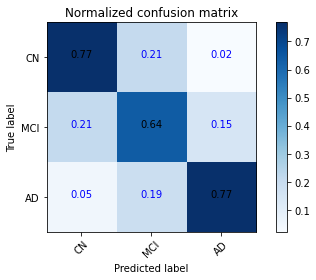

In [8]:
classnames = num.array(['CN', 'MCI', 'AD'], dtype='<U10')
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    num.set_printoptions(precision=2)

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=classnames, normalize=True, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plot.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = num.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.


    for i in range (cnf_matrix.shape[0]):
        for j in range (cnf_matrix.shape[1]):
          plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                    color="black" if cnf_matrix[i, j] > thresh else "blue")
          plot.tight_layout()
          plot.ylabel('True label')
          plot.xlabel('Predicted label')

    return cnf_matrix
plot_confusion_matrix(predicted_targets, actual_targets)

##General result:

In [9]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(x, y)
ElasticNetCV(cv=5, random_state=0)

#print(regr.alpha_)
#print(regr.intercept_)
print("alpha = {0:.8f}, intercept = {1:.8f}"
      .format(regr.alpha_, regr.intercept_))

alpha = 0.00131645, intercept = 2.55857322


##Folds Results:

0.04140340759195557

0.9154639175257702

R2:0.457, MSE:0.27, RMSE:0.52

........................................................

0.058597523381108615

0.9134020618556689

R2:0.368, MSE:0.32, RMSE:0.57

........................................................


0.03704463325706939

0.9134020618556672

R2:0.376, MSE:0.32, RMSE:0.56

........................................................


0.0611091874272161

0.9134020618556687

R2:0.419, MSE:0.29, RMSE:0.54

........................................................


0.046280845138387955

0.9152892561983488

R2:0.400, MSE:0.31, RMSE:0.55

In [10]:
print('List of possible accuracy:', score_targets)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(score_targets)*100, '%')
print('\nMinimum Accuracy:',
	min(score_targets)*100, '%')
print('\nOverall Accuracy:',
	mean(score_targets)*100, '%')
print('\nStandard Deviation is:', stdev(score_targets))

List of possible accuracy: [0.4  0.42 0.38 0.37 0.46]

Maximum Accuracy That can be obtained from this model is: 45.694104712849025 %

Minimum Accuracy: 36.769215938155384 %

Overall Accuracy: 40.37767887307741 %

Standard Deviation is: 0.03591597714714523


In [11]:
#Array check:

#set array_name to one of these: ( lst_accu_stratified ,score_targets ,Alf_targets ,Intr_targets ,mse_targets ,
#                                  predicted_targets ,actual_targets ,ypred_Elastic )
array_name = Alf_targets
print('List of possible values:', array_name)
print('\nMaximum value:',
	max(array_name)*100, )
print('\nMinimum value:',
	min(array_name)*100, )
print('\nOverall value:',
	mean(array_name)*100, )
print('\nStandard Deviation is:', stdev(array_name))

List of possible values: [0.05 0.06 0.04 0.06 0.04]

Maximum value: 6.110918742721609

Minimum value: 3.704463325706939

Overall value: 4.888711935914753

Standard Deviation is: 0.010567804624617365
